In [112]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [113]:
df = pd.read_csv('data/train_processed.csv')

In [114]:
feats = list(set(df.columns) - set(['logSalePrice', 'SalePrice']))

In [115]:
df_normalized[feats] = (df[feats] - df[feats].mean()) / df[feats].std()
df_normalized['logSalePrice'] = df['logSalePrice']
df_normalized['SalePrice'] = df['SalePrice']

In [160]:
lasso_cv = LassoCV(cv=5, random_state=0, alphas=10 ** np.arange(-3.5, -2.8, 0.01))
lasso_cv.fit(df_normalized[feats], df_normalized['logSalePrice'])

LassoCV(alphas=array([0.00031623, 0.00032359, 0.00033113, 0.00033884, 0.00034674,
       0.00035481, 0.00036308, 0.00037154, 0.00038019, 0.00038905,
       0.00039811, 0.00040738, 0.00041687, 0.00042658, 0.00043652,
       0.00044668, 0.00045709, 0.00046774, 0.00047863, 0.00048978,
       0.00050119, 0.00051286, 0.00052481, 0.00053703, 0.00054954,
       0.00056234, 0.00057544, 0.00058884, 0.00060256, 0.0006166...
       0.00079433, 0.00081283, 0.00083176, 0.00085114, 0.00087096,
       0.00089125, 0.00091201, 0.00093325, 0.00095499, 0.00097724,
       0.001     , 0.00102329, 0.00104713, 0.00107152, 0.00109648,
       0.00112202, 0.00114815, 0.0011749 , 0.00120226, 0.00123027,
       0.00125893, 0.00128825, 0.00131826, 0.00134896, 0.00138038,
       0.00141254, 0.00144544, 0.00147911, 0.00151356, 0.00154882,
       0.00158489]),
        cv=5, random_state=0)

In [161]:
lasso_cv.alphas_

array([0.00158489, 0.00154882, 0.00151356, 0.00147911, 0.00144544,
       0.00141254, 0.00138038, 0.00134896, 0.00131826, 0.00128825,
       0.00125893, 0.00123027, 0.00120226, 0.0011749 , 0.00114815,
       0.00112202, 0.00109648, 0.00107152, 0.00104713, 0.00102329,
       0.001     , 0.00097724, 0.00095499, 0.00093325, 0.00091201,
       0.00089125, 0.00087096, 0.00085114, 0.00083176, 0.00081283,
       0.00079433, 0.00077625, 0.00075858, 0.00074131, 0.00072444,
       0.00070795, 0.00069183, 0.00067608, 0.00066069, 0.00064565,
       0.00063096, 0.0006166 , 0.00060256, 0.00058884, 0.00057544,
       0.00056234, 0.00054954, 0.00053703, 0.00052481, 0.00051286,
       0.00050119, 0.00048978, 0.00047863, 0.00046774, 0.00045709,
       0.00044668, 0.00043652, 0.00042658, 0.00041687, 0.00040738,
       0.00039811, 0.00038905, 0.00038019, 0.00037154, 0.00036308,
       0.00035481, 0.00034674, 0.00033884, 0.00033113, 0.00032359,
       0.00031623])

In [162]:
lasso_cv.alpha_

0.0009549925860214135

In [163]:
mse_path_df = pd.DataFrame({
    'alpha': lasso_cv.alphas_,
    'mse': np.mean(lasso_cv.mse_path_, axis=1)
})

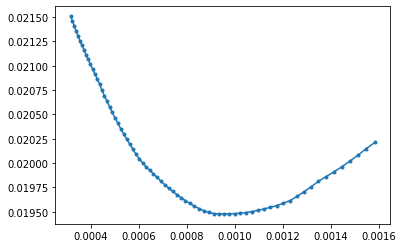

In [164]:
plt.plot(mse_path_df['alpha'], mse_path_df['mse'], '.-')